<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats

import seaborn as sns
sns.set_context('talk')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import plotly
# plotly.__version__
# !pip install ipdb

In [2]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,3.00,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,4.00,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00


In [3]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


#Procesamiento de datos de AirBnb

In [4]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
]
  #'description', 'neighborhood_overview',
 # 'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
 # 'price', 'weekly_price', 'monthly_price',
 # 'latitude', 'longitude'
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
airbnb_df.head()

,street,neighborhood,city,suburb,state,zipcode,price,weekly_price,monthly_price
0,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,60,nan,nan
1,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,35,200.00,803.00
2,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,159,1253.00,4452.00
3,"Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,50,250.00,920.00
4,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,69,400.00,1900.00


In [6]:
df_bnb = airbnb_df.copy()

In [7]:
#sacar la serie usar df
df_bnb['Postcode'] = pd.Series(pd.to_numeric(df_bnb.zipcode, errors = 'coerce', downcast = 'integer'), dtype = 'int64', name = 'postcode')
df_bnb.Postcode.isna().sum()

146

In [8]:
#checking nan values
df_bnb = df_bnb[~df_bnb.Postcode.isna()]
df_bnb.Postcode.isna().sum()

0

In [9]:
#tiramos la columnda zipcode
df_bnb = df_bnb.drop('zipcode', axis = 1)
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22749 entries, 0 to 22894
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   street         22749 non-null  object 
 1   neighborhood   16973 non-null  object 
 2   city           22749 non-null  object 
 3   suburb         22746 non-null  object 
 4   state          22690 non-null  object 
 5   price          22749 non-null  int64  
 6   weekly_price   2512 non-null   float64
 7   monthly_price  1882 non-null   float64
 8   Postcode       22749 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.7+ MB


In [10]:
postcodes = df_bnb.Postcode.value_counts()
#no se que hace esto: probablemente es la distribución eliminando valores extremos
df_bnb = df_bnb[df_bnb.Postcode.isin(postcodes[postcodes > 11].index)]
df_bnb

,street,neighborhood,city,suburb,state,price,weekly_price,monthly_price,Postcode
0,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,60,nan,nan,3105.00
1,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,35,200.00,803.00,3057.00
2,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,159,1253.00,4452.00,3182.00
3,"Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,50,250.00,920.00,3071.00
4,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,69,400.00,1900.00,3183.00
...,...,...,...,...,...,...,...,...,...
22890,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,55,nan,nan,3053.00
22891,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,129,nan,nan,3338.00
22892,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,53,nan,nan,3150.00
22893,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,130,nan,nan,3006.00


In [11]:
df_bnb.groupby('Postcode').mean().reset_index()

,Postcode,price,weekly_price,monthly_price
0,3000.00,150.50,918.74,3407.20
1,3002.00,200.98,956.38,3712.71
2,3003.00,130.21,760.20,2629.50
3,3004.00,158.27,1061.17,3759.93
4,3006.00,188.85,1239.83,4358.56
...,...,...,...,...
165,3805.00,225.24,622.00,2178.67
166,3806.00,488.27,540.00,nan
167,3809.00,76.21,286.00,1008.00
168,3810.00,94.95,723.33,3800.00


In [12]:
melb_df['Postcode'].isna().sum()

0

#Obtención de DataSet

In [13]:
df = pd.merge(melb_df, df_bnb.groupby('Postcode').mean().reset_index(), how = 'left', on=['Postcode'])

In [14]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price,weekly_price,monthly_price
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00,124.03,526.35,1901.61
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,3.00,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00,191.09,612.25,2119.75
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,4.00,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75


In [15]:
df.Price.describe()

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64

Eliminación de Valores extremos en 'Price'

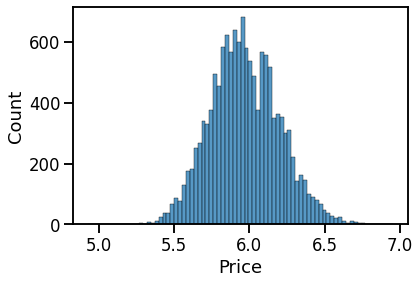

In [16]:
log_price = np.log10(df.Price)
sns.histplot(log_price)

In [17]:
shapiro_test = stats.shapiro(np.log10(df.Price.sample(4500)))
shapiro_test

(0.9969456195831299, 6.423210408001978e-08)

In [18]:
#Límite Inferior
10**(log_price.mean()-log_price.std()*3)

191955.0069553842

In [19]:
#Límite Superior
10**(log_price.mean()+log_price.std()*3)

4527748.07661868

In [20]:
#esto no se que hace
df = df[(df.Price < 10**(log_price.mean()+log_price.std()*3))&(df.Price > 10**(log_price.mean()-log_price.std()*3))]
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price,weekly_price,monthly_price
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,nan,nan,Yarra,-37.80,145.00,Northern Metropolitan,4019.00,130.62,605.15,2187.03
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00,130.62,605.15,2187.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.00,S,Barry,26/08/2017,16.70,3150.00,4.00,2.00,2.00,652.00,nan,1981.00,NaN,-37.91,145.17,South-Eastern Metropolitan,7392.00,124.03,526.35,1901.61
13576,Williamstown,77 Merrett Dr,3,h,1031000.00,SP,Williams,26/08/2017,6.80,3016.00,3.00,2.00,2.00,333.00,133.00,1995.00,NaN,-37.86,144.88,Western Metropolitan,6380.00,191.09,612.25,2119.75
13577,Williamstown,83 Power St,3,h,1170000.00,S,Raine,26/08/2017,6.80,3016.00,3.00,2.00,4.00,436.00,nan,1997.00,NaN,-37.85,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75
13578,Williamstown,96 Verdon St,4,h,2500000.00,PI,Sweeney,26/08/2017,6.80,3016.00,4.00,1.00,5.00,866.00,157.00,1920.00,NaN,-37.86,144.89,Western Metropolitan,6380.00,191.09,612.25,2119.75


# Análisis de Datos Faltantes

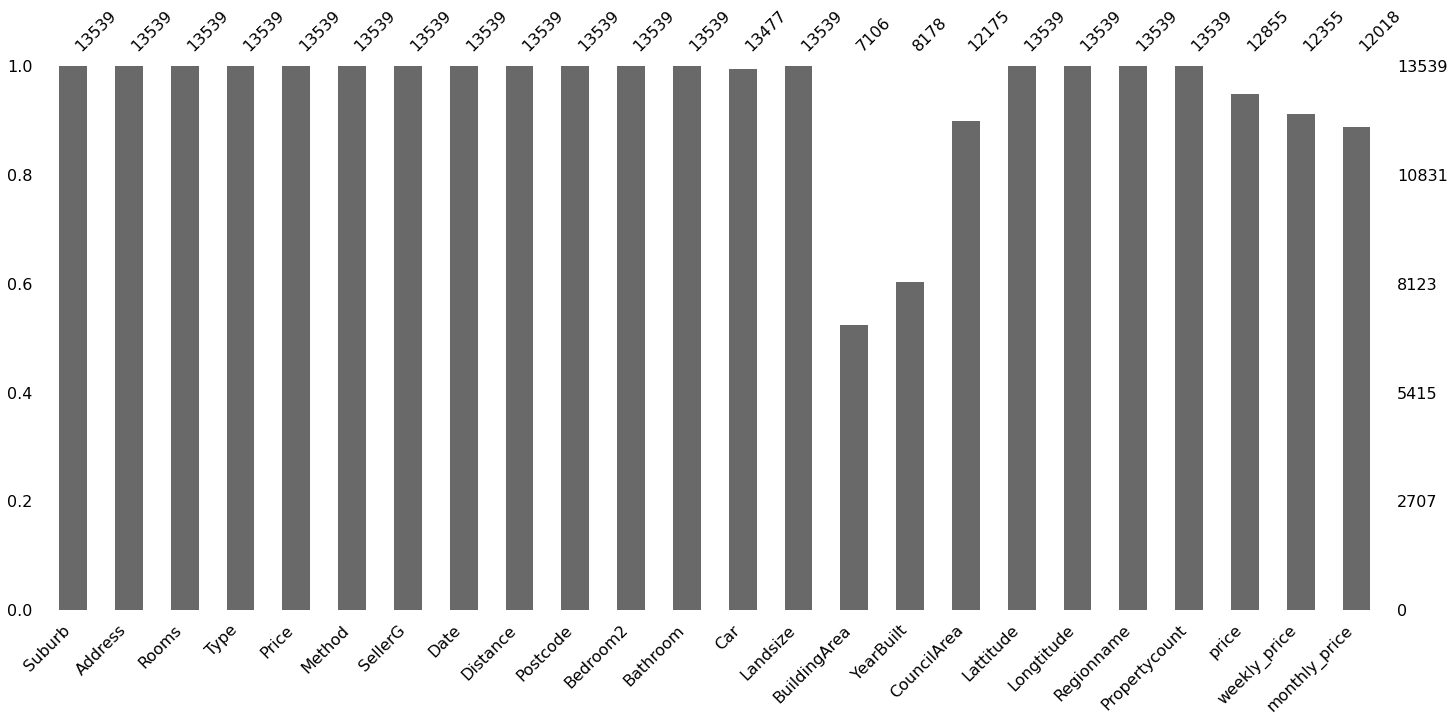

In [21]:
msn.bar(df)

In [22]:
#Proponemos imputar con la media de YearBuilt del Suburb correspondiente
#quiero imputar la columna year built con la media de la columna suburb, agrupada por suburbio.
suburb_year = dict(pd.Series(df.groupby('Suburb').YearBuilt.mean().round(), dtype = 'Int64'))
#Diccionario que contiene la equivalencia entre los valores de 'Suburb' y la media de 'YearBuilt'

In [38]:
df_YB_mean = df.groupby('Suburb').YearBuilt.mean().round().astype('Int64').reset_index()
df_YB_mean = df_YB_mean.rename(columns={"YearBuilt": "YearBuilt_mean"})
df_YB_mean

,Suburb,YearBuilt_mean
0,Abbotsford,1945
1,Aberfeldie,1979
2,Airport West,1984
3,Albanvale,1980
4,Albert Park,1904
...,...,...
309,Wonga Park,<NA>
310,Wyndham Vale,2001
311,Yallambie,1982
312,Yarra Glen,1975


In [39]:
df_YB_mean.isna().sum()

Suburb             0
YearBuilt_mean    12
dtype: int64

In [45]:
#Suburbs sin Year_Built_mean
df_YB_mean[pd.isnull(df_YB_mean['YearBuilt_mean'])].reset_index()

,index,Suburb,YearBuilt_mean
0,16,Aspendale Gardens,<NA>
1,17,Attwood,<NA>
2,19,Bacchus Marsh,<NA>
3,50,Bullengarook,<NA>
4,91,Croydon South,<NA>
5,102,Docklands,<NA>
6,198,Monbulk,<NA>
7,211,New Gisborne,<NA>
8,243,Rockbank,<NA>
9,254,Silvan,<NA>


In [36]:
#tiramos los 12 Nan values
df_YB_mean =df_YB_mean.dropna()
df_YB_mean

,Suburb,YearBuilt
0,Abbotsford,1945
1,Aberfeldie,1979
2,Airport West,1984
3,Albanvale,1980
4,Albert Park,1904
...,...,...
308,Wollert,2012
310,Wyndham Vale,2001
311,Yallambie,1982
312,Yarra Glen,1975


In [37]:
#consultamos Nan values y vemos que ya no hay
df_YB_mean.isna().sum()

Suburb       0
YearBuilt    0
dtype: int64

In [47]:

def impute_YB(suburb):
    sub_df = df_YB_mean[df_YB_mean['Suburb'] == suburb]
    if not sub_df.empty:
        return sub_df.iloc[0,1]
    else:
        return None

# l-value : actualizar la columna df['YearBuilt']
# r-value : para cada fila donde el valor de df['YearBuilt'] es Nan llamar a la función impute_YB, sino queda el valor que está.
# x en la función lambda es una FILA del df por definición

df['YearBuilt'] = df.apply(
    lambda x: impute_YB(x['Suburb']) if pd.isnull(x['YearBuilt']) else x['YearBuilt'],axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
#quedan 18 valores nulos, debido a los 12 suburbs sin media
df['YearBuilt'].isna().sum()

19

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
def estudio(serie,out=0.99):
  
  variable='ninguna'
  if serie.dtype=='object':
    serie=serie.astype('category')
    variable='categoria'
  elif serie.dtype in ('float','float64','float32','float16'):
    variable='continua'
  elif serie.dtype in ('int','int32','int64','int16'):
    variable='discreta'
  print(variable)
  #CATEGORIAS
  
  if variable=='categoria':
    countplt, ax = plt.subplots(figsize = (18,7))
    categorias=serie.unique()
    n=8
    if len(categorias)<=n:
      nva=resumen.nlargest(n)
      orden=list(nva.index)
      ax=sns.countplot(x=serie,order=orden)
    else:
      dict={}
      resumen=serie.value_counts()
      nva=resumen.nlargest(n-1)
      orden=list(nva.index)

      for i in resumen.index:
        if resumen.loc[i]<nva.iloc[-1]:
          dict[i]='Otro'
        else:
          dict[i]=i
      orden=orden+['Otro']
      serie2=serie.replace(dict)
      ax=sns.countplot(x=serie2,order=orden)
    for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
    plt.xticks(rotation=30);
  elif variable=='continua':
    fig, ax = plt.subplots(2,1,figsize = (18,7))
    sns.histplot(serie,bins=50,ax=ax[0])
    sns.boxplot(serie,ax=ax[1])
    print(serie.describe())
  elif variable=='discreta':
    categorias=serie.unique()
    n=50
    if len(categorias)>n:
      fig, ax = plt.subplots(2,1,figsize = (18,7))
      sns.histplot(serie,bins=50,ax=ax[0])
      sns.boxplot(serie,ax=ax[1])
      print(serie.describe())
    else:
      countplt, ax = plt.subplots(figsize = (18,7))
    categorias=serie.unique()
    n=8
    if len(categorias)<=n:
      nva=resumen.nlargest(n)
      orden=list(nva.index)
      ax=sns.countplot(x=serie,order=orden)
    else:
      dict={}
      resumen=serie.value_counts()
      nva=resumen.nlargest(n-1)
      for i in resumen.index:
        if resumen.loc[i]<nva.iloc[-1]:
          dict[i]='Otro'
        else:
          dict[i]=i
      serie2=serie.replace(dict)
      ax=sns.countplot(x=serie2)
    for rect in ax.patches:
      ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
    plt.xticks(rotation=30);




In [ ]:
estudio(df['Rooms'])

# **Respuestas**

## **Ejercicio 1**

### **1.Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.**

Se procede a estudiar los outliers tanto superiores como inferiores

In [ ]:
f,ax=plt.subplots(figsize=(15,6))
sns.histplot(melb_df['Price'],bins=50)

In [ ]:
precio1=melb_df['Price']
precio1.describe()

Se ve que el valor máximo llega a **9.000.000 USD** cuando el tercer cuartil es **1.330.000 USD**.

Analizando el histograma y los parametros descriptivos se ve la existencia de outliers, sobre todo para el lado del máximo. 


In [ ]:
limite_sup=precio1.quantile(0.99)
print(f'Limite superior propuesto: {limite_sup.round(2)} \nCantidad de valores totales: {len(precio1)} \nValores que quedarian fuera: {(precio1>limite_sup).sum()}\n')


rangointer=precio1.quantile(0.75)-precio1.quantile(0.25)
w=(limite_sup-precio1.quantile(0.75))/rangointer

f,ax=plt.subplots(figsize=(15,2))
sns.boxplot(melb_df['Price'],whis=w)


Se podria tomar como limite superior para dejar fuera los outliers superiores, el percentil del **99%**, dejando afuera solo **136 valores**.

Por lo tanto se toma como limite superior el valor de **3.338.150 USD**

In [ ]:
f,ax=plt.subplots(figsize=(15,6))
precio2=melb_df[(melb_df['Price']<limite_sup)]['Price']
sns.histplot(precio2,bins=50)

In [ ]:
f,ax=plt.subplots(figsize=(15,2))
sns.boxplot(precio2,whis=3.9)

In [ ]:

limite_inf=precio1.quantile(0.005)
print(f'Limite inferior propuesto: {limite_inf.round(2)} \nCantidad de valores totales: {len(precio1)} \nValores que quedarian fuera: {(precio1<limite_inf).sum()}\n')


Se podria tomar como limite inferior para dejar fuera los outliers inferiores, el percentil del **0,5%**, dejando afuera solo **64 valores**.
se propone un limite inferior de 0,5% y no de 1% como el superior por que estan más cercanos a la media y por lo tanto tienen menos influencia que los superiores. 

Por lo tanto se toma como limite inferior el valor de **270.000,0 USD** y se procede a relaizar el histograma final y una descricion de la variable **'Price'**

In [ ]:
df=melb_df[(melb_df['Price']>=limite_inf) & (melb_df['Price']<=limite_sup)]
precio=df['Price']
estudio(df['Rooms'])
f,ax=plt.subplots(figsize=(15,6))
sns.histplot(precio,bins=50)
precio.describe()

### **2.Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.**
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

In [ ]:
df.isna().sum()

In [ ]:
variables=list(df.columns)
for variable in variables:
  print(variable,len(df[variable].unique()))

Como primer medidida se dejaria afuera **CouncilArea**, porque segun nuestro criterio tiene muchos faltantes y puede ser reeemplazada por mejores variables que den una ubicacion aproximada de la propiedad (como puede ser Suburb o PostCode), **Address** tampoco se tendria en cuenta porque es un valor categorico que es casi unico para cada propiedad y sería mejor utilizar otras variables para definir una ubicacion.

La variable **SellerG** es una variable categorica de muchos valores posibles y el vendedor no deberia ser un factor importante en el precio de la propiedad 

**YearBuilt** y **BuildingArea** tienen muchos valores faltantes lo que podria ser un motivo para no tenerlas en cuenta, pero es cierto que parecieran ser parametros que influirian en el precio de la propiedad, por lo que por el momento se dejarian en estudio

In [ ]:
variables=list(variables)
excluir={'CouncilArea','Address','SellerG'}
svariables=set(variables)
svariables=svariables-excluir



In [ ]:
scategoricas={'Regionname','Type','Suburb','Method','Regionname'}
sdiscretas={'Rooms','Car','Bedroom2','Bathroom','Postcode'}
stiempo={'Date'}
snumericas=svariables-scategoricas-sdiscretas-stiempo

numericas=list(snumericas)

f,axs=plt.subplots(len(numericas),1,figsize=(15,6*len(numericas)))
for variable in numericas:
    sns.histplot(df[variable],bins=50,ax=axs[numericas.index(variable)])


In [ ]:
f,axs=plt.subplots(len(numericas),1,figsize=(15,6*len(numericas)))
for variable in numericas:
    sns.boxplot(df[variable],ax=axs[numericas.index(variable)])

Se ven outliers en algunas variables (BuildingArea, Landsize, YearBuilt), por lo que seria conveniente trabajar sobre estos valores, tal vez borrarlos o trabajarlos para corregirlos


In [ ]:
print(df[(df['YearBuilt']<1800)]['YearBuilt'])
print(df[(df['BuildingArea']>2000)]['BuildingArea'])
print(df[(df['Landsize']>50000)]['Landsize'])

In [ ]:
df_filtrado=df[((df['YearBuilt']!=1196)&((df['BuildingArea']<= 2000)|(df['BuildingArea'].isnull())) &((df['Landsize']<=50000)|(df['Landsize'].isnull())))]

print(len(df),len(df_filtrado))

In [ ]:

f,axs=plt.subplots(len(numericas),1,figsize=(15,6*len(numericas)))

for variable in numericas:
  sns.scatterplot(data=df_filtrado, x=variable, y=df_filtrado['Price'],ax=axs[numericas.index(variable)])


In [ ]:
categoricas=list(scategoricas)

f,axs=plt.subplots(len(categoricas),1,figsize=(18,6*len(categoricas)))
for variable in categoricas:
    sns.barplot(data=df,x=variable,y='Price',ax=axs[categoricas.index(variable)])

### 3.Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.


In [ ]:
airbnb_df.info()

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']
airbnb_df.isna().sum()

la columna precio no tiene valores perdidos, comparada con weekly price o monthly price, entiendo que s epodria usar la mediana

  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  

3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


La columna Suburb es una buena variable para combinar

In [ ]:
airb=set(airbnb_df.suburb.unique())
melb=set(melb_df.Suburb.unique())

intersections = airb.intersection(melb)
print("Airbnb unique Suburb", len(airbnb_df.suburb.unique()))
print("Sales unique Suburb", len(melb_df.Suburb.unique()))
print("Common Suburb", len(intersections))

In [ ]:
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
intersection = np.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

In [ ]:
print('Records in Sales df with corresponding suburb form Airbnb df',
      melb_df.Suburb.isin(intersections).sum() / len(melb_df))
print('Records in Airbnb df with corresponding suburb form Sales df',
      airbnb_df.suburb.isin(intersections).sum() / len(airbnb_df))

In [ ]:
#Intento de salvar valores fuera de la intercepcion de codigo postal
melb_dfnzc=melb_df[(~melb_df.Postcode.isin(intersection))]
melbnzc=set(melb_dfnzc.Suburb.unique())

intersectionsnzc = airb.intersection(melbnzc)
print("Airbnb unique Suburb", len(airbnb_df.suburb.unique()))
print("Sales unique Suburb", len(melb_dfnzc.Suburb.unique()))
print("Common Suburb", len(intersectionsnzc))


In [ ]:
#Intento de salvar valores fuera de la intercepcion de suburbios
melb_dfnsb=melb_df[(~melb_df.Suburb.isin(intersections))]
melbnsb=set(melb_dfnsb.Postcode.unique())

intersectionsnsb = airb.intersection(melbnsb)
print("Airbnb unique Zipcode", len(airbnb_df.zipcode.unique()))
print("Sales unique Postcode", len(melb_dfnsb.Postcode.unique()))
print("Common zipcode", len(intersectionsnsb))

In [ ]:
airbnb_df[(airbnb_df.suburb.isin(intersections))].isna().sum()

In [ ]:
airbnb_df[(airbnb_df.zipcode.isin(intersection))].isna().sum()

## Ejercicio 2: Imputación



### 1.Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).




### 2.Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.